In [60]:
# import key libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [61]:
# list all datasets for this project.
print(os.listdir("../input"))

['train.csv', 'gender_submission.csv', 'test.csv']


In [62]:
# load datasets
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
gender_submission = pd.read_csv('../input/gender_submission.csv')

In [63]:
# take a look at the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From running the code snippet above, we can observe that there are some missing entries for the Age, Cabin and Embarked columns, with Cabin having the most number (687) of missing entries. But how important are these columns to our goal?

In [64]:
# List the first 5 entries in our training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# List the last 5 entries in our training dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [66]:
# List the number of passenger classes
train.Pclass.unique()

array([3, 1, 2])

Is there a positive correlation between passenger classes and survival?

In [104]:
survival_numbers_by_class = train.groupby(['Pclass','Survived']).count()['PassengerId']
survival_numbers_by_class

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

From the image above, we can see that a disporportionate number of people in Pclass #3 did not survive, whilst the greatest no of survivers are in Pclass #1. Is there more to this? Let's convert numerical values to percentages and see.

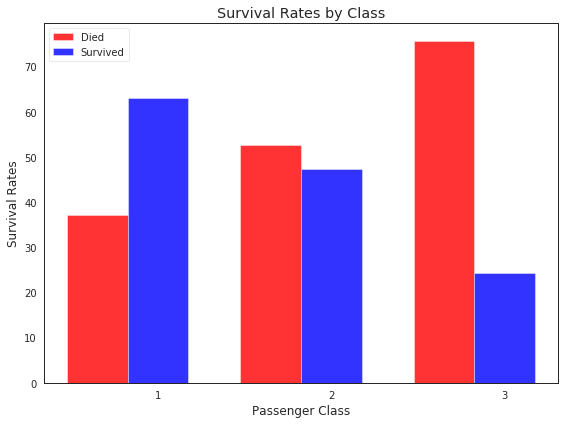

In [131]:
survival_numbers_by_class = train.groupby(['Pclass','Survived']).count()['PassengerId']
survival_percentages = {}

# Convert to percentages
for n in range(1, 4):
    survival_percentages[n] = (round(survival_numbers_by_class[n][0] * 100 /survival_numbers_by_class[n].sum(), 2), 
                                          round(survival_numbers_by_class[n][1] * 100 /survival_numbers_by_class[n].sum(), 2))

survival_rates_by_class = pd.DataFrame(survival_percentages)

# generate plot
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, survival_rates_by_class.iloc[0], bar_width,
alpha=opacity,
color='red',
label='Died')
 
rects2 = plt.bar(index + bar_width, survival_rates_by_class.iloc[1], bar_width,
alpha=opacity,
color='blue',
label='Survived')
 
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rates (%)')
plt.title('Survival Rates by Class')
plt.xticks(index + bar_width, ('1', '2', '3'))
plt.legend()
 
plt.tight_layout()
plt.show()

From the bar chart above, it is evident that a critical factor in determining if a traveller escaped is the passegner class with morality rates increasing as the passenger class number increases. Let's move on to Sex column to see if there are any other insights.[](http://)

In this section, we'll attempt to find out if the sex of a passenger playing a factor in theie survival chances.

In [139]:
survival_numbers_by_sex = train.groupby(['Sex','Survived']).count()['PassengerId']
survival_numbers_by_sex

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

With 387 more deceased males, there is a strong chance that t

On taking a closer look at the training dataset, some observations come to mind. 
> 1. It is highly unlikey that the 'PassengerId' column plays a role in determining whether a passenger survives or not and thus should be discarded.